In [4]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [5]:
class Analysis():
    def __init__(self):
        np.random.seed(12341324)
        
        #데이터 셋 생성
    def create_dataset(self, num = 5000):
        if num % 2 == 1:
            return None
        data_len = int(num / 2)
        return np.random.random(num).reshape(data_len , 2)
        
        # 데이터 플로팅
    def plot_data(self, data):
        if len(data.shape) != 2 :
            print('데이터를 확인해주세요.')
            return
        plt.figure(figsize=(7, 7))
        plt.plot(data[:, 0], data[:, 1], 'b.')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.show()
        
        # 데이터 분류
    def classify_data(self, data):
        target = []
        for i in range(len(data)):
            if data[i, 0] < 0.5 and data[i, 1] < 0.5:
                if data[i,0] > data[i,1]:
                    target.append('type0')
                else:
                    target.append('type1')
            elif data[i, 0] >= 0.5 and data[i, 1] < 0.5:
                if -data[i,0]+1 >  data[i,1]:
                    target.append('type2')
                else:
                    target.append('type3')
            elif data[i, 0] < 0.5 and data[i, 1] >= 0.5:
                if  -data[i,0] +1 > data[i,1]:
                    target.append('type4')
                else:
                    target.append('type5')
            elif data[i, 0] >= 0.5 and data[i, 1] >= 0.5:
                if data[i,0] > data[i,1]:
                    target.append('type6')
                else:
                    target.append('type7')
            
        return np.array(target)
    
        # 데이터 인코딩
    def encode_data(self, target):
        encoder = LabelBinarizer()
        target = encoder.fit_transform(target)
        return target
        
        # percent를 이용한 train test 데이터 구분
    def get_train_And_test(self, data, percent = 80):
        if percent > 100 :
            print('파라미터를 확인해주세요')
            return 
        criteria = int((len(data) * percent) / 100)
        print('기준 ', criteria)
        return (data[0 : criteria], data[criteria : ])
    
        # 모델 생성
    def create_model(self, x_train, t_train, epoch_num = 60, batch_num = 16):
        model = Sequential()
        model.add(Dense(16, input_dim = 2, activation = 'sigmoid' ))
        model.add(Dense(16, activation = 'sigmoid' ))
        model.add(Dense(8, activation = 'softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        hist = model.fit(x_train, t_train, epochs = epoch_num, batch_size = batch_num)
        return (model, hist)
    
        # history 플로팅
    def plot_history(self, hist):
        plt.figure(figsize = (15, 5))
        plt.plot(hist.history['loss'], 'y', label = 'loss')
        plt.plot(hist.history['accuracy'], 'b', label = 'acc')
        plt.xlabel('epoch')
        plt.legend(loc = 'best')
        plt.show()
        
        # 모델 평가
    def evaluate_model(self, model, x_test, t_test):
        return model.evaluate(x_test, t_test)

In [ ]:
analysis = Analysis()

In [7]:
data = analysis.create_dataset(20000)
print(data[0 : 5])

[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]
 [0.52936037 0.72605929]]


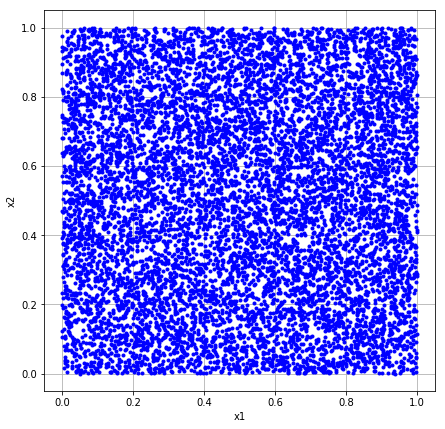

In [8]:
analysis.plot_data(data)

In [9]:
target = analysis.classify_data(data)
print(target[0 : 7])
print(data[0:7])

['type2' 'type2' 'type6' 'type3' 'type7' 'type6' 'type0']
[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]
 [0.52936037 0.72605929]
 [0.65663633 0.52812004]
 [0.31814543 0.26193147]]


In [20]:
print(len(target[target=='type0']))
print(len(target[target=='type1']))
print(len(target[target=='type2']))
print(len(target[target=='type3']))
print(len(target[target=='type4']))
print(len(target[target=='type5']))
print(len(target[target=='type6']))
print(len(target[target=='type7']))


1238
1200
1237
1252
1258
1249
1327
1239


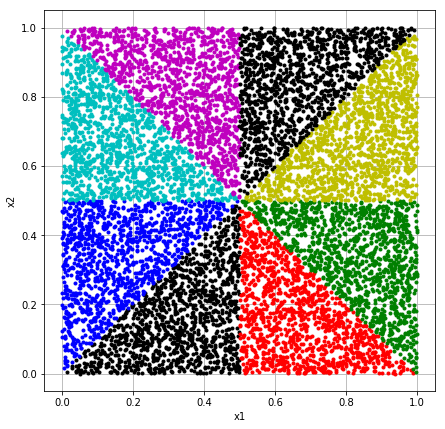

In [44]:
plt.figure(figsize=(7, 7))
plt.plot(data[:,0][target == 'type0'],data[:,1][target == 'type0'], 'k.')
plt.plot(data[:,0][target == 'type1'],data[:,1][target == 'type1'], 'b.')
plt.plot(data[:,0][target == 'type2'],data[:,1][target == 'type2'], 'r.')
plt.plot(data[:,0][target == 'type3'],data[:,1][target == 'type3'], 'g.')
plt.plot(data[:,0][target == 'type4'],data[:,1][target == 'type4'], 'c.')
plt.plot(data[:,0][target == 'type5'],data[:,1][target == 'type5'], 'm.')
plt.plot(data[:,0][target == 'type6'],data[:,1][target == 'type6'], 'y.')
plt.plot(data[:,0][target == 'type7'],data[:,1][target == 'type7'], 'k.')


plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

plt.show()

In [59]:
encoded_target = analysis.encode_data(target)
print(encoded_target[0:10])

[[0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0]]


In [37]:
(x_train, x_test) = analysis.get_train_And_test(data, 80)
print(x_train[0 : 4])
(t_train, t_test) = analysis.get_train_And_test(encoded_target, 80)
print(t_train[0 : 4])


기준  8000
[[0.53611486 0.33261872]
 [0.67773492 0.08546784]
 [0.74827761 0.53073078]
 [0.81486819 0.48834371]]
기준  8000
[[0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]]


In [38]:
(model, hist) = analysis.create_model(x_train, t_train, 10, 16)

Epoch 1/10
8000/8000 [==============================] - 1s 125us/step - loss: 2.0744 - accuracy: 0.1401
Epoch 2/10
8000/8000 [==============================] - 1s 83us/step - loss: 1.9999 - accuracy: 0.3149
Epoch 3/10
8000/8000 [==============================] - 1s 74us/step - loss: 1.7785 - accuracy: 0.5207
Epoch 4/10
8000/8000 [==============================] - 1s 101us/step - loss: 1.3780 - accuracy: 0.7048
Epoch 5/10
8000/8000 [==============================] - 1s 111us/step - loss: 1.0476 - accuracy: 0.8186
Epoch 6/10
8000/8000 [==============================] - 1s 102us/step - loss: 0.8471 - accuracy: 0.8763
Epoch 7/10
8000/8000 [==============================] - ETA: 0s - loss: 0.7185 - accuracy: 0.91 - 1s 105us/step - loss: 0.7174 - accuracy: 0.9130
Epoch 8/10
8000/8000 [==============================] - 1s 128us/step - loss: 0.6237 - accuracy: 0.9224
Epoch 9/10
8000/8000 [==============================] - 1s 137us/step - loss: 0.5504 - accuracy: 0.9436
Epoch 10/10
8000/8000 [=

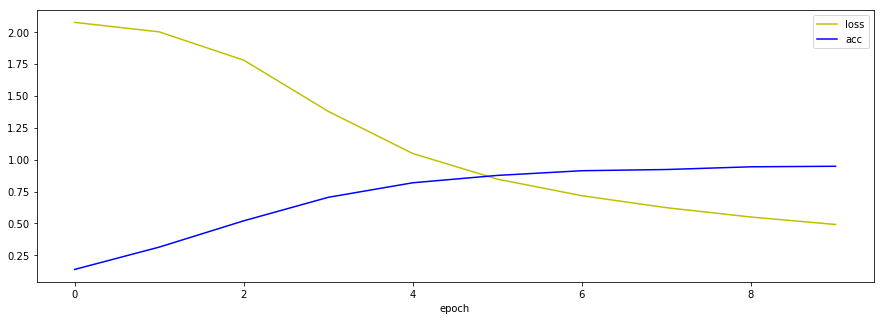

In [39]:
analysis.plot_history(hist)

In [ ]:
analysis.evaluate_model(model, x_test, t_test)